In [23]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [37]:
import zipfile
import os

# File paths
zip_path = r"D:\Cat_or_dog.zip"  # Path to the ZIP file
extract_to = r"D:\Cat_or_dog"    # Path where the files will be extracted

# Extract files
def extract_files(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

# Correct call to extract the ZIP file
extract_files(zip_path, extract_to)

# Paths after extraction
train_path = os.path.join(extract_to, 'Train')
test_path = os.path.join(extract_to, 'Test')

# Now you can access the train and test directories
print(f"Train Path: {train_path}")
print(f"Test Path: {test_path}")

# Data Exploration
num_cats_train = len(os.listdir(os.path.join(train_dir, 'cats')))
num_dogs_train = len(os.listdir(os.path.join(train_dir, 'dogs')))

print(f"Number of cat images in training: {num_cats_train}")
print(f"Number of dog images in training: {num_dogs_train}")

Train Path: D:\Cat_or_dog\Train
Test Path: D:\Cat_or_dog\Test


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'D:\\Cat_or_dog\\Train\\cats'

In [ ]:
# New function to visualize images
def visualize_sample_images(directory, num_images=5):
    plt.figure(figsize=(15, 3))
    categories = ['cats', 'dogs']
    for i, category in enumerate(categories):
        category_path = os.path.join(directory, category)
        images = os.listdir(category_path)[:num_images]
        for j, img_name in enumerate(images):
            img_path = os.path.join(category_path, img_name)
            img = image.load_img(img_path, target_size=(150, 150))
            img_array = image.img_to_array(img)
            plt.subplot(2, num_images, i*num_images + j + 1)
            plt.imshow(img_array.astype('uint8'))
            plt.title(f"{category.capitalize()} {j+1}")
            plt.axis('off')
    plt.tight_layout()
    plt.show()

# Call the function to visualize images
print("Visualizing sample images from the training set:")
visualize_sample_images(train_dir)

In [34]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

Found 23650 images belonging to 2 classes.
Found 3863 images belonging to 2 classes.


In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Model Building
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# If you're running TensorFlow in compatibility mode (if needed)
#tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)


In [36]:
# Model Training
epochs = 20
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

Epoch 1/20
739/739 [==============================] - 774s 1s/step - loss: 0.6549 - accuracy: 0.6072 - val_loss: 0.5876 - val_accuracy: 0.6883
Epoch 2/20
739/739 [==============================] - 704s 953ms/step - loss: 0.5892 - accuracy: 0.6829 - val_loss: 0.5258 - val_accuracy: 0.7487
Epoch 3/20
739/739 [==============================] - 980s 1s/step - loss: 0.5532 - accuracy: 0.7145 - val_loss: 0.5243 - val_accuracy: 0.7503
Epoch 4/20
739/739 [==============================] - 534s 723ms/step - loss: 0.5260 - accuracy: 0.7379 - val_loss: 0.4603 - val_accuracy: 0.7859
Epoch 5/20
739/739 [==============================] - 3020s 4s/step - loss: 0.5051 - accuracy: 0.7532 - val_loss: 0.4261 - val_accuracy: 0.8188
Epoch 6/20
739/739 [==============================] - 642s 869ms/step - loss: 0.4795 - accuracy: 0.7728 - val_loss: 0.4090 - val_accuracy: 0.8159
Epoch 7/20
739/739 [==============================] - 506s 685ms/step - loss: 0.4588 - accuracy: 0.7852 - val_loss: 0.4107 - val_acc

In [38]:
# Model Evaluation
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")

121/121 [==============================] - 48s 395ms/step - loss: 0.2518 - accuracy: 0.8990
Test accuracy: 0.8990421891212463


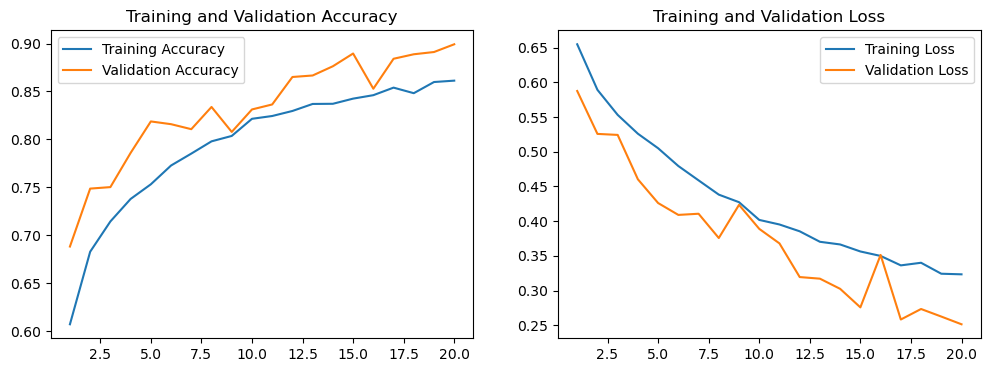

In [39]:
# Visualize training history
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    plt.show()

plot_training_history(history)
